In [1]:
# Importing read_data from utilities.py in the misc folder
# from ..misc.utilities import read_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_traffic = '/Users/fiyinolatunji/Downloads/project_dal/dataset/Traffic_Crashes.csv'
data = pd.read_csv(dataset_traffic)

/var/folders/kr/b10wzmlx3rvd7q6_879fdf940000gn/T/ipykernel_85686/352247785.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### Common ways to verify and ensure data quality:

1. Checking for missing values

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802064 entries, 0 to 802063
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                802064 non-null  object 
 1   CRASH_DATE_EST_I               60087 non-null   object 
 2   CRASH_DATE                     802064 non-null  object 
 3   POSTED_SPEED_LIMIT             802064 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         802064 non-null  object 
 5   DEVICE_CONDITION               802064 non-null  object 
 6   WEATHER_CONDITION              802064 non-null  object 
 7   LIGHTING_CONDITION             802064 non-null  object 
 8   FIRST_CRASH_TYPE               802064 non-null  object 
 9   TRAFFICWAY_TYPE                802064 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      802064 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [3]:
# print sum of missing values for each feature
df = pd.DataFrame(data)
missing_values = df.isna()

In [4]:
sum_missing_values = missing_values.sum()

# Filter out the features that have missing values
features_with_missing_values = sum_missing_values[sum_missing_values > 0]

# Calculate the percentage of missing values for each feature
percentage_missing = ( features_with_missing_values / len(df)) * 100


# Create a DataFrame to display features with missing values, their missing percentages, and types
missing_data_df = pd.DataFrame({   
    'Missing Values': features_with_missing_values,
    'Percentage (%)': percentage_missing.values,
})
print(missing_data_df)


                               Missing Values  Percentage (%)
CRASH_DATE_EST_I                       741977       92.508453
LANE_CNT                               603058       75.188264
REPORT_TYPE                             23558        2.937172
INTERSECTION_RELATED_I                 618193       77.075271
NOT_RIGHT_OF_WAY_I                     765044       95.384408
HIT_AND_RUN_I                          551264       68.730675
STREET_DIRECTION                            4        0.000499
STREET_NAME                                 1        0.000125
BEAT_OF_OCCURRENCE                          5        0.000623
PHOTOS_TAKEN_I                         791588       98.693870
STATEMENTS_TAKEN_I                     784319       97.787583
DOORING_I                              799595       99.692169
WORK_ZONE_I                            797440       99.423487
WORK_ZONE_TYPE                         798476       99.552654
WORKERS_PRESENT_I                      800881       99.852506
MOST_SEV

2. Check for duplicates and high-cardinality features

In [5]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [6]:
def determine_cardinality(df):
    HIGH_CARDINALITY_THRESHOLD = 100 # This threshold can be adjusted as needed
    high_cardinality_features = []
    low_cardinality_features = []

    for column in df.columns:
        num_unique = df[column].nunique()
        if num_unique > HIGH_CARDINALITY_THRESHOLD:  
            high_cardinality_features.append(column)
        else:
            low_cardinality_features.append(column)

    return high_cardinality_features, low_cardinality_features

high_cardinality, low_cardinality = determine_cardinality(df) 
print(f'High Cardinality Features: {high_cardinality}')
print(f'Low Cardinality Features: {low_cardinality}')

High Cardinality Features: ['CRASH_RECORD_ID', 'CRASH_DATE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'LATITUDE', 'LONGITUDE', 'LOCATION']
Low Cardinality Features: ['CRASH_DATE_EST_I', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']


3. Check for Outliers

IQR is used because it is robust to outliers itself. It focuses on the range where the middle 50% of the data lie, making it less sensitive to extreme values compared to other methods like standard deviation.

In [7]:
def detect_outliers_iqr(val):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)

    #Calculate interquartile range (IQR)
    IQR = Q3 -Q1

    #Define lower and upper bounds for outlier detection
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((val < lowerbound) | (val > upperbound))
    return outliers.sum()
# Apply the function to each numerical column in the DataFrame
outlier_counts = df.select_dtypes(include=[np.number]).apply(detect_outliers_iqr)

# Filter out columns without any outliers
features_with_outliers = outlier_counts[outlier_counts > 0]

pd.DataFrame(columns=['outliers count'],data=features_with_outliers)



,outliers count
POSTED_SPEED_LIMIT,211912
LANE_CNT,2385
STREET_NO,4479
BEAT_OF_OCCURRENCE,4
NUM_UNITS,100393
INJURIES_TOTAL,110074
INJURIES_FATAL,878
INJURIES_INCAPACITATING,13741
INJURIES_NON_INCAPACITATING,64624
INJURIES_REPORTED_NOT_EVIDENT,37248


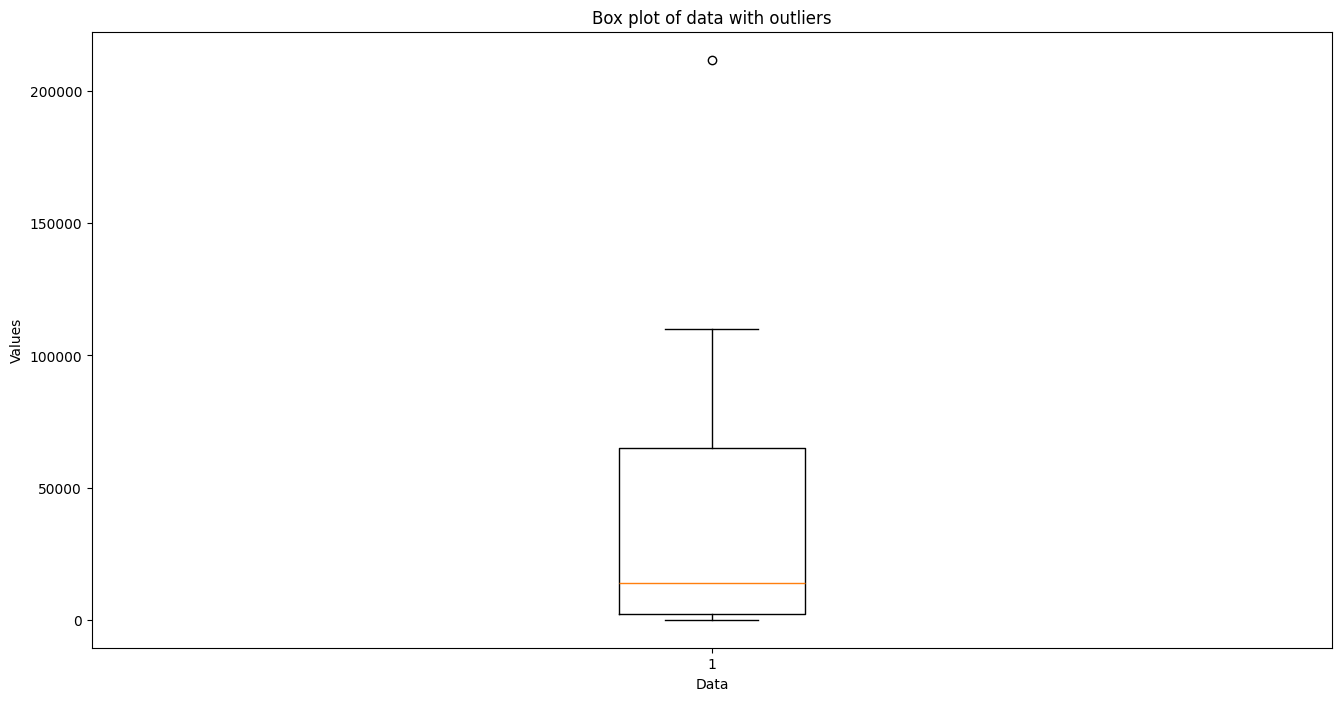

In [8]:
# Drawing a box plot
plt.figure(figsize=(16, 8))
plt.boxplot(features_with_outliers)
plt.title('Box plot of data with outliers')
plt.xlabel('Data')
plt.ylabel('Values')
plt.show()